In [4]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for chloroplath plotting
import chart_studio.plotly as py
import plotly.graph_objs as go 
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import datetime as dt

# pandas general settings
pd.options.display.max_columns = None

data = pd.read_csv('/content/Global_Superstore2.csv',encoding='windows-1252')

Data preparation

In [6]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical


In [7]:
data[['order_day','order_month','order_year']] = data['Order Date'].str.split('-', expand=True)
data['Order Date'] = data['order_year'] + '/' + data['order_month'] + '/' + data['order_day']
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [8]:
data[['ship_day','ship_month','ship_year']] = data['Ship Date'].str.split('-', expand=True)
data['Ship Date'] = data['ship_year'] + '/' + data['ship_month'] + '/' + data['ship_day']
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [9]:
data.drop(columns=['order_day','order_month','order_year','ship_day','ship_month','ship_year'], inplace=True)

In [10]:
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35598 entries, 0 to 35597
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          35598 non-null  int64         
 1   Order ID        35598 non-null  object        
 2   Order Date      35598 non-null  datetime64[ns]
 3   Ship Date       35598 non-null  datetime64[ns]
 4   Ship Mode       35598 non-null  object        
 5   Customer ID     35598 non-null  object        
 6   Customer Name   35598 non-null  object        
 7   Segment         35598 non-null  object        
 8   City            35598 non-null  object        
 9   State           35598 non-null  object        
 10  Country         35598 non-null  object        
 11  Postal Code     5774 non-null   float64       
 12  Market          35598 non-null  object        
 13  Region          35598 non-null  object        
 14  Product ID      35598 non-null  object        
 15  Ca

Row ID            35598
Order ID          20357
Order Date         1417
Ship Date          1464
Ship Mode             4
Customer ID        1586
Customer Name       795
Segment               3
City               3439
State              1059
Country             147
Postal Code         577
Market                7
Region               13
Product ID         9174
Category              3
Sub-Category         17
Product Name       3402
Sales             19113
Quantity             14
Discount             27
Profit            19276
Shipping Cost      9696
Order Priority        4
dtype: int64

In [11]:
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35598 entries, 0 to 35597
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          35598 non-null  int64         
 1   Order ID        35598 non-null  object        
 2   Order Date      35598 non-null  datetime64[ns]
 3   Ship Date       35598 non-null  datetime64[ns]
 4   Ship Mode       35598 non-null  category      
 5   Customer ID     35598 non-null  object        
 6   Customer Name   35598 non-null  object        
 7   Segment         35598 non-null  category      
 8   City            35598 non-null  object        
 9   State           35598 non-null  object        
 10  Country         35598 non-null  category      
 11  Postal Code     5774 non-null   float64       
 12  Market          35598 non-null  category      
 13  Region          35598 non-null  category      
 14  Product ID      35598 non-null  object        
 15  Ca

In [13]:
def remove_leading_spaces(df):
    for cols in df.columns:
        if df[cols].dtypes in ['object','category']:
            df[cols] = df[cols].str.strip()
        return df

In [14]:
data = remove_leading_spaces(data)

In [15]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical


In [16]:
data['Order_year'] = data['Order Date'].dt.year

In [17]:
print('Number of unique customers made purchase in 2011: {}'.format(data[data['Order_year']==2011]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2012: {}'.format(data[data['Order_year']==2012]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2013: {}'.format(data[data['Order_year']==2013]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2014: {}'.format(data[data['Order_year']==2014]['Customer Name'].nunique()))

Number of unique customers made purchase in 2011: 792
Number of unique customers made purchase in 2012: 793
Number of unique customers made purchase in 2013: 795
Number of unique customers made purchase in 2014: 794


In [18]:
def total_purchase_in_year(row):
    Order_year = row[24]
    
    if Order_year in [2011,2012,2013]:
        return 795
    else:
        return 794
    
    

data['unique_customers_within_year'] = data.apply(total_purchase_in_year, axis='columns')

In [19]:
data['Revenue'] = data['Sales'] * data['Quantity']

Product Analysis

Q 1. Which country has top sales?

In [20]:
country_group = data.groupby('Country')
country_sales = country_group.agg({'Sales':'sum'})
country_sales.sort_values(by='Sales', ascending=False)

,Sales
Country,
United States,2.204312e+06
Australia,9.026165e+05
France,8.352787e+05
China,6.867208e+05
Germany,6.141902e+05
...,...
Tajikistan,2.353320e+02
Macedonia,1.986600e+02
Eritrea,1.699200e+02


Ans. United States has the highest sales

In [21]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import squarify

In [23]:
top_10_sales = country_sales.nlargest(10, 'Sales')
top_10_sales.index

CategoricalIndex(['United States', 'Australia', 'France', 'China', 'Germany',
                  'Mexico', 'India', 'United Kingdom', 'Indonesia', 'Brazil'],
                 categories=['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', ...], ordered=False, dtype='category', name='Country')

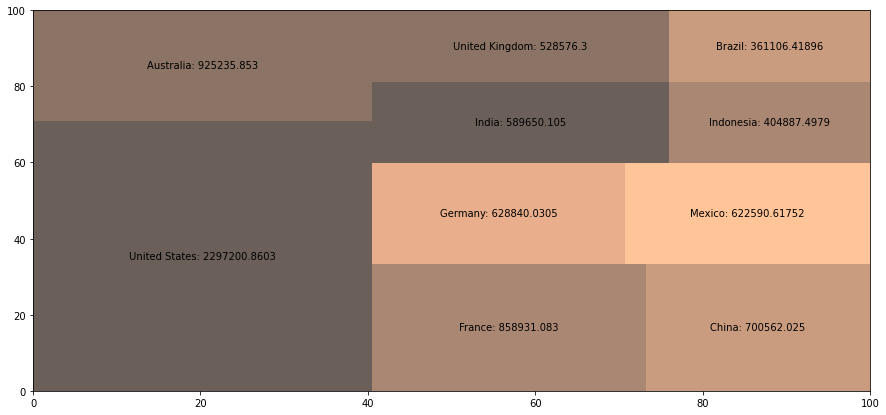

In [24]:
plt.figure(figsize=(15,7))
revs = top_10_sales['Sales'].values
labels = ['United States: 2297200.8603',
         'Australia: 925235.853',
         'France: 858931.083',
         'China: 700562.025',
         'Germany: 628840.0305',
         'Mexico: 622590.61752',
         'India: 589650.105',
         'United Kingdom: 528576.3',
         'Indonesia: 404887.4979',
         'Brazil: 361106.41896']
squarify.plot(revs, label=labels,color= sns.color_palette('copper'), alpha=0.7)
plt.show()

Q 2. Which are the top 5 profit making product types on yearly basis?

In [25]:
year_category_group = data.groupby(['Order_year','Sub-Category'])
year_category_proft_df = year_category_group.agg({'Profit':'sum'})
year_category_proft_df

Profit
Order_year Sub-Category            
2011       Accessories   15555.9469
           Appliances    21889.2360
           Art           10152.0357
           Binders       10668.8852
           Bookcases     27402.9015
...                             ...
2014       Paper         17938.7078
           Phones        70483.9842
           Storage       38893.6774
           Supplies       7057.8417
           Tables       -29989.5989

[68 rows x 1 columns]

In [26]:
year_category_proft_df.reset_index(inplace=True)
category_yearly_profit = year_category_proft_df.groupby('Order_year')
top5_profit_category = pd.DataFrame(columns=year_category_proft_df.columns)

In [27]:
for g, d in category_yearly_profit:
    high_profit_categories = d.nlargest(5, 'Profit')
    top5_profit_category = pd.concat([top5_profit_category,high_profit_categories])

Ans. Top 5 profit making products is given in the below dataframe

In [28]:
top5_profit_category.style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, 'Profit'])

,Order_year,Sub-Category,Profit
13,2011,Phones,54095.556600
6,2011,Copiers,30349.767360
5,2011,Chairs,29883.237100
4,2011,Bookcases,27402.901500
1,2011,Appliances,21889.236000
23,2012,Copiers,51796.352600
30,2012,Phones,43383.164900
17,2012,Accessories,33517.701200
22,2012,Chairs,28659.408100
21,2012,Bookcases,28573.040900


Q 3. How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level

In [29]:
data['Unit_price'] = data['Sales']/data['Quantity']
data['Order_day'] = data['Order Date'].dt.day

Ans. We can see that when the prices are lower sales are high and when the prices increase, sales decrease

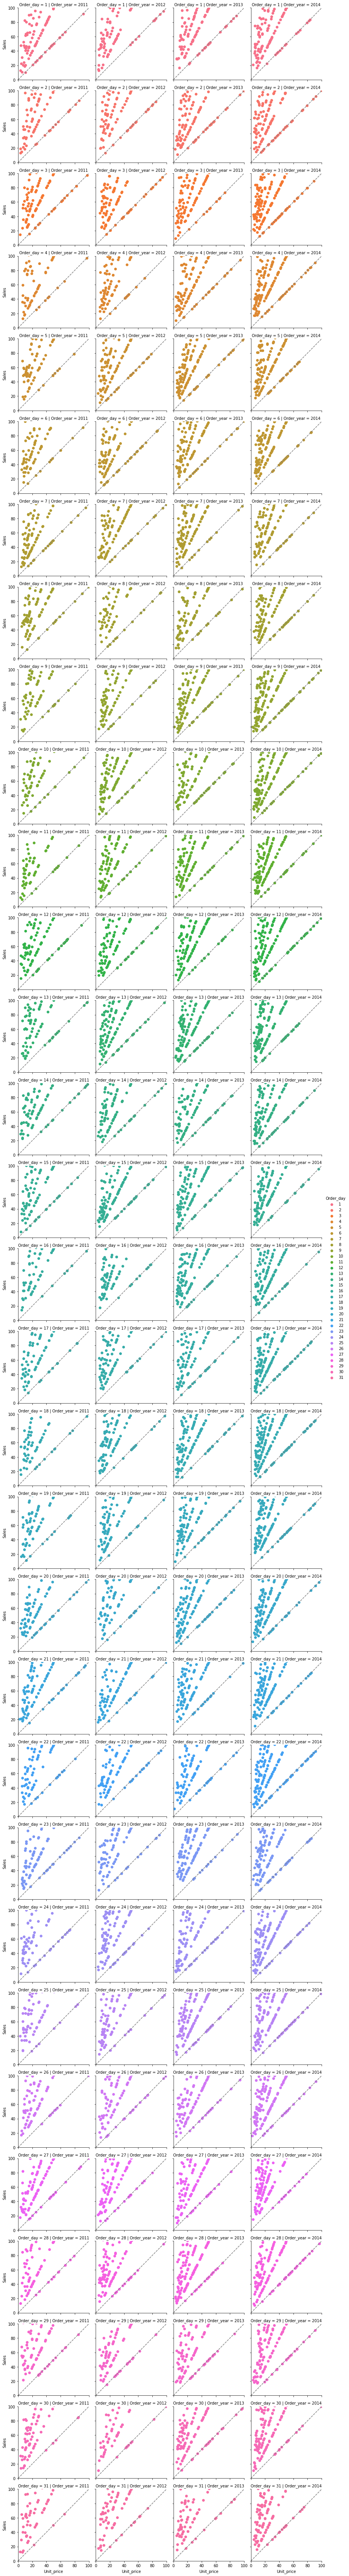

In [30]:
g5 = sns.FacetGrid(data, row = 'Order_day', col = 'Order_year', hue = 'Order_day')
kwe = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g5 = g5.map(plt.scatter, 'Unit_price', 'Sales')
g5.set(xlim=(0,100), ylim=(0,100))
for ax in g5.axes.flat:
    ax.plot((0,100),(0,100), c = 'gray', ls = '--')
g5.add_legend()

Q 4. What is the average delivery time across the counties

In [31]:
data['Delivery_duration'] = data['Ship Date']-data['Order Date']
country_group = data.groupby('Country')
delivery_duration_df = country_group.agg({'Delivery_duration':'mean'})
delivery_duration_df['Duration_in_hours'] = delivery_duration_df['Delivery_duration'] / dt.timedelta(hours=1)

In [32]:
delivery_duration_df

,Delivery_duration,Duration_in_hours
Country,,
Afghanistan,4 days 12:31:18.260869565,108.521739
Albania,3 days 12:00:00,84.000000
Algeria,3 days 14:53:01.395348837,86.883721
Angola,3 days 23:07:19.024390243,95.121951
Argentina,3 days 15:02:14.439834024,87.037344
...,...,...
Venezuela,4 days 01:26:53.793103448,97.448276
Vietnam,3 days 15:19:26.197183098,87.323944
Yemen,3 days 04:21:49.090909090,76.363636


Ans.

In [33]:
top10_sales_country_DD =top_10_sales.merge(delivery_duration_df, how='left', left_index=True, right_index=True)
top10_sales_country_DD.reset_index(inplace=True)
top10_sales_country_DD.sort_values(by='Duration_in_hours')

,Country,Sales,Delivery_duration,Duration_in_hours
9,Brazil,3.471627e+05,3 days 18:09:00,90.150000
0,United States,2.204312e+06,3 days 18:26:18.662971943,90.438517
3,China,6.867208e+05,3 days 19:32:01.699935608,91.533806
5,Mexico,5.977311e+05,3 days 19:39:20.165975103,91.655602
1,Australia,9.026165e+05,3 days 19:55:08.502024291,91.919028
2,France,8.352787e+05,3 days 20:05:30.532698137,92.091815
8,Indonesia,3.907721e+05,3 days 20:39:12.191235059,92.653386
6,India,5.759863e+05,3 days 20:54:55.297805642,92.915361
4,Germany,6.141902e+05,3 days 23:29:20.615020697,95.489060
7,United Kingdom,5.101902e+05,4 days 01:00:41.379310344,97.011494


In [34]:
top10_sales_country_DD.iplot(kind='bar',x='Country', y='Duration_in_hours',
                            title= 'Countries And their Average Product Delivery Duration in Hours',
                            xTitle='Countries',
                            yTitle= 'AVG Delivery Duration in hours')